<a href="https://colab.research.google.com/github/Koitoresu/Micro-Credential-Winter-2022/blob/main/Loan_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pydot
#!pip install pydot-ng
#!pip install graphviz
#!pip install --upgrade scikit-learn==0.20.3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/loan_data.csv')

#EDA

In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [ ]:
df.describe

<bound method NDFrame.describe of       credit.policy             purpose  ...  pub.rec  not.fully.paid
0                 1  debt_consolidation  ...        0               0
1                 1         credit_card  ...        0               0
2                 1  debt_consolidation  ...        0               0
3                 1  debt_consolidation  ...        0               0
4                 1         credit_card  ...        0               0
...             ...                 ...  ...      ...             ...
9573              0           all_other  ...        0               1
9574              0           all_other  ...        0               1
9575              0  debt_consolidation  ...        0               1
9576              0    home_improvement  ...        0               1
9577              0  debt_consolidation  ...        0               1

[9578 rows x 14 columns]>

In [ ]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [ ]:
df['purpose'].nunique()

7

In [ ]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [ ]:
df['credit.policy'].nunique()

2

In [ ]:
df['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

#KNN Computation

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar = StandardScaler()

In [ ]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [ ]:
df2 = df.copy()

In [ ]:
df2.drop(['purpose'], 1, inplace=True)    # Dropping Purpose since non-int values

In [ ]:
df2.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
#Training our model to search for patterns within the DataFrame which excludes Purpose and Credit.policy
scalar.fit(df2.drop('credit.policy' , axis = 1))  

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# Transforming the values within the DataFrame to give it new values 
scaledFeatures = scalar.transform(df2.drop('credit.policy', axis =1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [ ]:
# Created a new DataFrame using new values 
dataFeature = pd.DataFrame(scaledFeatures, columns = df2.columns[:-1])

In [ ]:
dataFeature

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,-0.436524
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,-0.436524
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,-0.436524
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,-0.436524
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,-0.436524
...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0.873884,0.123976,2.031030,-0.322023,-1.023118,2.368325,5.879467,1.216726,0.192048,-0.299730,-0.237003,2.290825
9574,0.099083,-0.296481,0.341170,-1.800898,0.293761,-0.072400,-0.495638,-1.575135,1.555604,-0.299730,-0.237003,2.290825
9575,-0.578868,-1.068670,-0.545694,0.070213,-0.628054,-0.444860,-0.203765,1.244300,2.919159,-0.299730,-0.237003,2.290825
9576,1.391660,0.156914,-0.182730,0.954924,-0.496366,-1.105722,-0.501089,-1.502753,1.555604,-0.299730,-0.237003,2.290825


In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(scaledFeatures, df2['credit.policy'], test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(1)

In [ ]:
knn.fit(xTrain, yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [ ]:
predict = knn.predict(xTest)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print (confusion_matrix(yTest,predict))

[[ 379  197]
 [ 123 2175]]


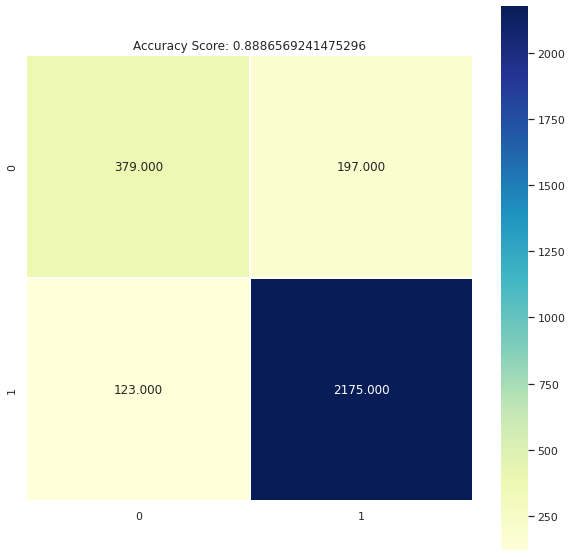

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(yTest, predict), 
            annot=True, 
            fmt='.3f', 
            linewidths=.5, 
            square=True, 
            cmap='YlGnBu')
plt.ylabel = ('Actual label')
plt.xlabel = ('Predicted label')
all_sample_title = f'Accuracy Score: {knn.score(xTest,yTest)}'
plt.title(all_sample_title, size=12);

In [ ]:
print(classification_report(yTest, predict))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       576
           1       0.92      0.95      0.93      2298

   micro avg       0.89      0.89      0.89      2874
   macro avg       0.84      0.80      0.82      2874
weighted avg       0.88      0.89      0.89      2874



# Testing Accuracy

In [ ]:
from sklearn import metrics

In [ ]:
score = []

In [ ]:
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(xTrain, yTrain)
  y_pred = knn.predict(xTest)
  score.append(metrics.accuracy_score(yTest, y_pred))

print(score)

[0.8886569241475296, 0.8716075156576201, 0.9001391788448155, 0.9046624913013221, 0.9043145441892833, 0.907098121085595, 0.9039665970772442, 0.9053583855254002, 0.9015309672929714, 0.9046624913013221, 0.8983994432846207, 0.9025748086290883, 0.8956158663883089, 0.8987473903966597, 0.8924843423799582, 0.8956158663883089, 0.8910925539318023, 0.89526791927627, 0.8903966597077244, 0.8928322894919972, 0.8869171885873347, 0.8897007654836465, 0.8862212943632568, 0.8903966597077244, 0.8858733472512178, 0.8900487125956854, 0.8851774530271399, 0.8879610299234516, 0.883437717466945, 0.8865692414752957, 0.8823938761308281, 0.8848295059151009, 0.8782185107863605, 0.8806541405706333, 0.8771746694502436, 0.8799582463465553, 0.8768267223382046, 0.8782185107863605, 0.8757828810020877]


TypeError: ignored

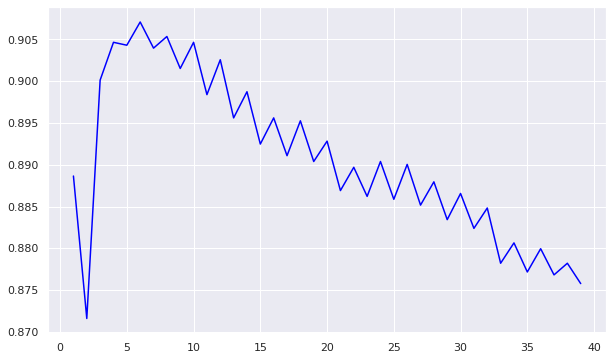

In [ ]:
plt.figure(figsize =(10,6))
plt.plot(range(1,40), score, color ="blue")
plt.xlabel('Value of k for KNN')
plt.ylabel('testing Accuarcy')

# Error Rates and K Values

In [ ]:
error_rate = []
# Might take some time
for i in range(1,40):

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(xTrain, yTrain)
  pred_i = knn.predict(xTest)
  error_rate.append(np.mean(pred_i != yTest))

TypeError: ignored

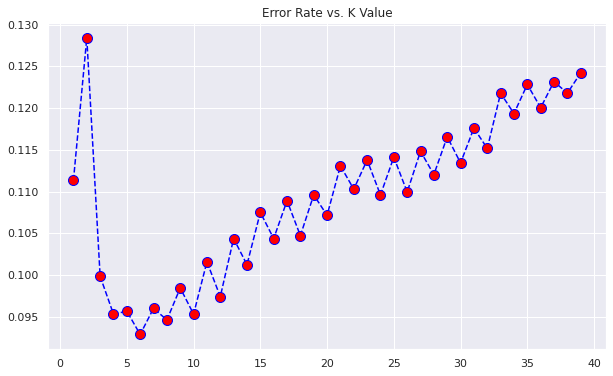

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color ='blue', linestyle='dashed', marker='o', 
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(xTrain,yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#Precision and Accuracy

In [ ]:
predictions = dtree.predict(xTest)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(yTest,predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       576
           1       0.99      0.99      0.99      2298

   micro avg       0.99      0.99      0.99      2874
   macro avg       0.98      0.98      0.98      2874
weighted avg       0.99      0.99      0.99      2874



In [ ]:
print(confusion_matrix(yTest,predictions))

[[ 560   16]
 [  15 2283]]


In [ ]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df2.columns[1:])
features

['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid']

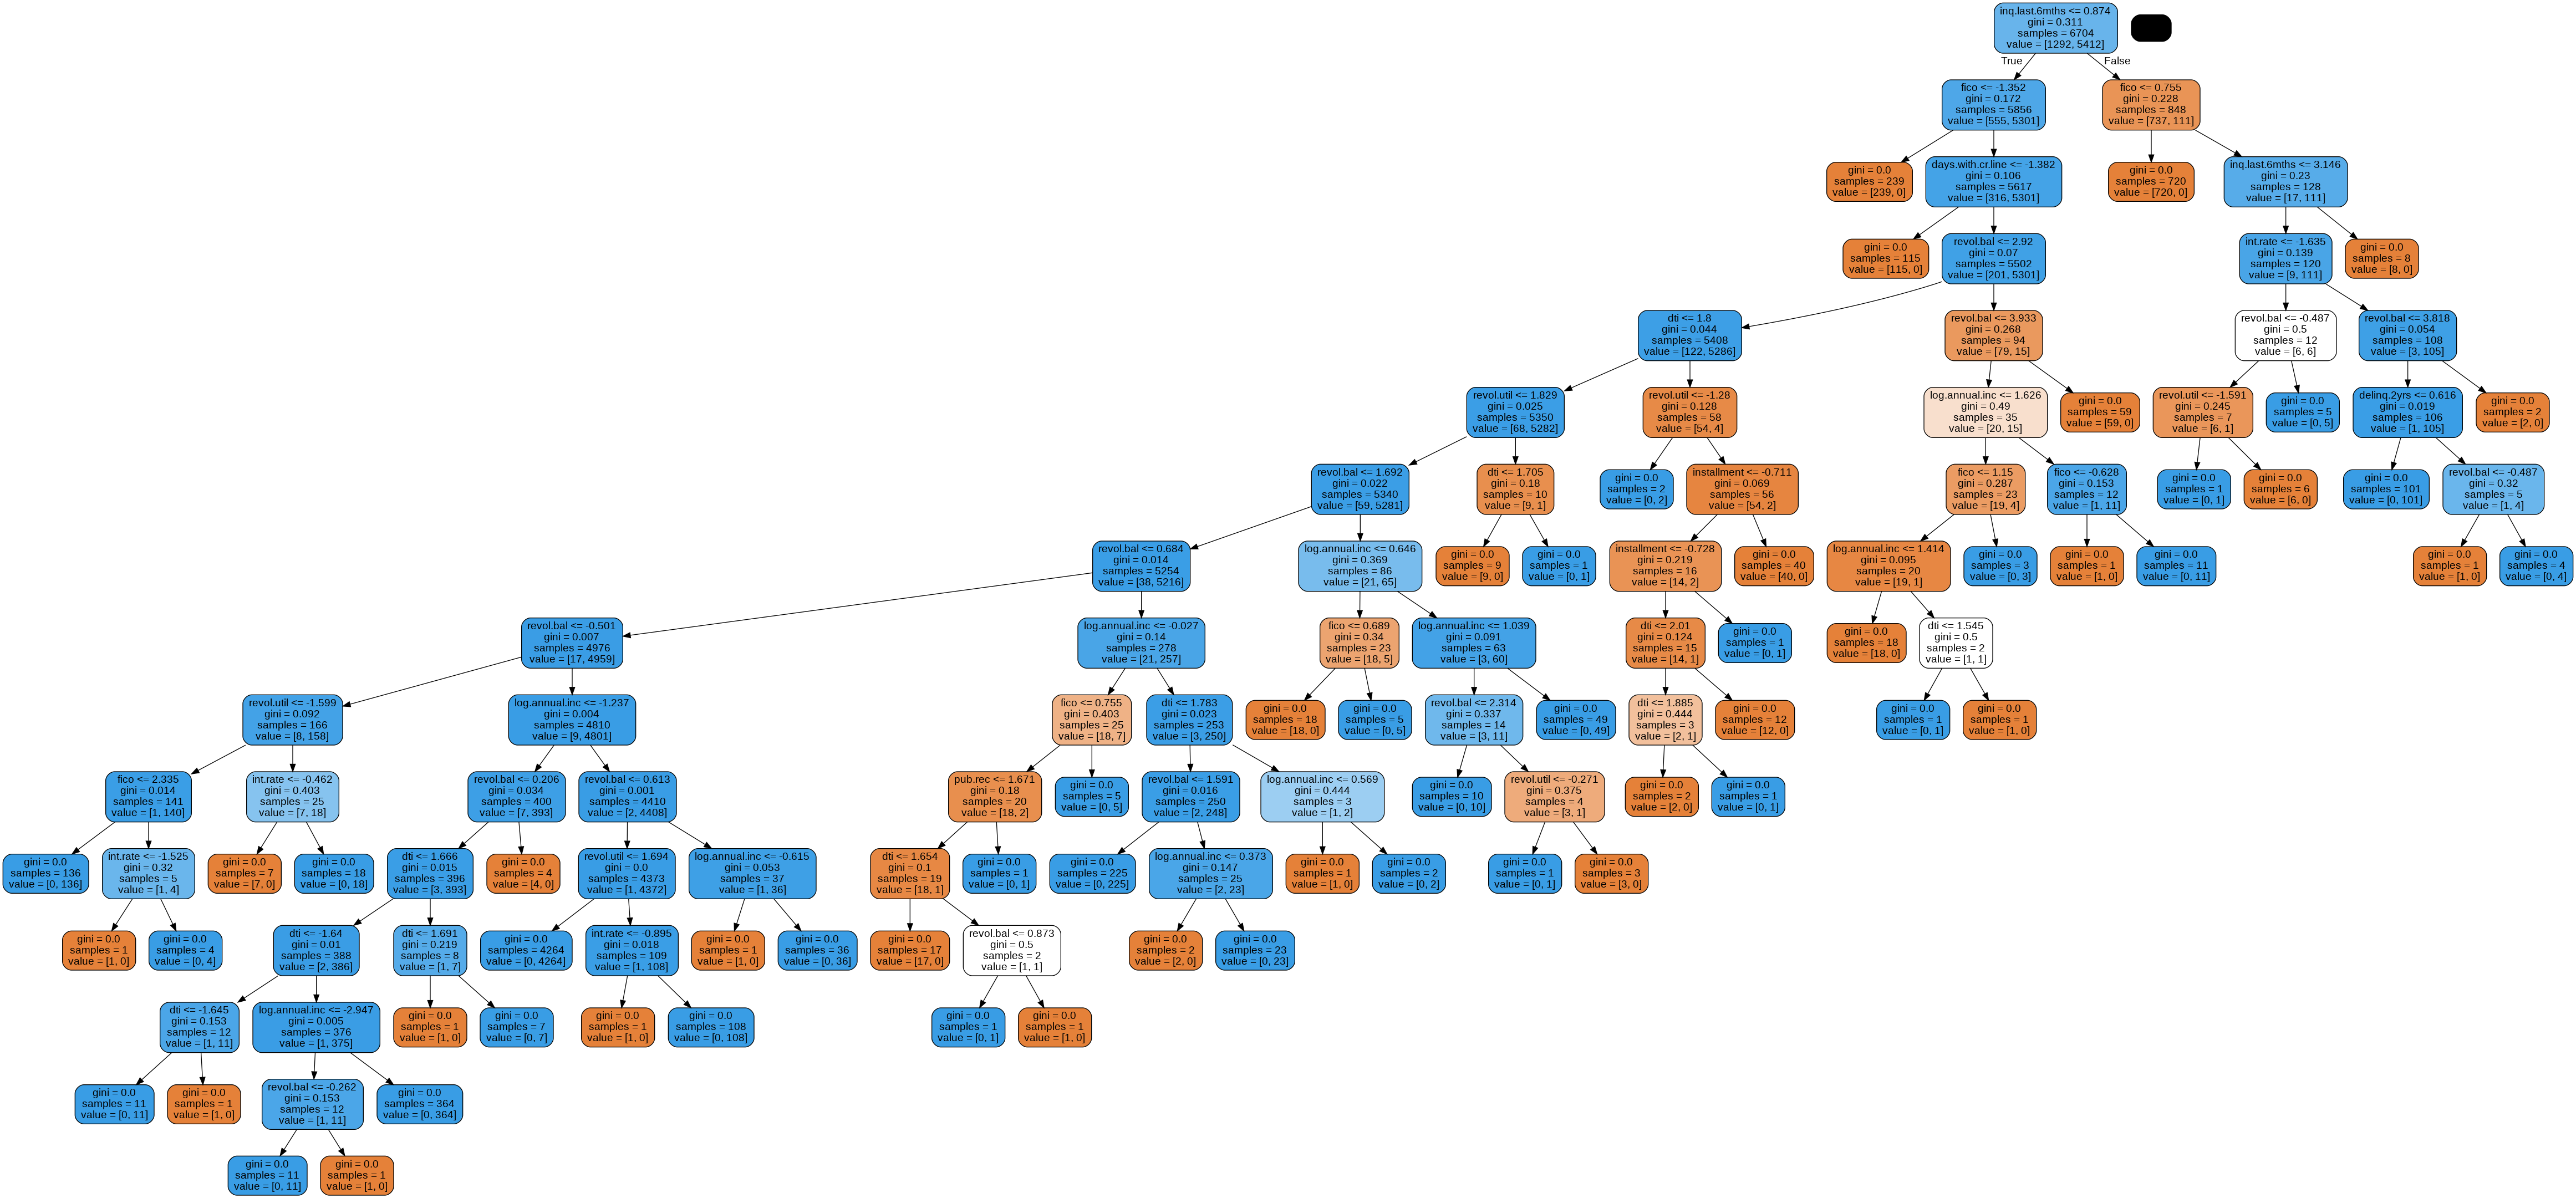

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

#Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(xTrain, yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
rfc_pred = rfc.predict(xTest)

In [ ]:
print(confusion_matrix(yTest, rfc_pred))

[[ 556   20]
 [   9 2289]]


In [ ]:
print(classification_report(yTest, rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       576
           1       0.99      1.00      0.99      2298

   micro avg       0.99      0.99      0.99      2874
   macro avg       0.99      0.98      0.98      2874
weighted avg       0.99      0.99      0.99      2874

